##**CSE4076 Image and Video Analytics**
**Assignment 2**\
Harish S 21MIA1046


---




Lab Task 1: Setup and Basic Extraction\
Objective:\
Install the necessary tools and libraries, and extract frame information from a video.\
Steps:\
1.Install ffmpeg and ffmpeg-python:
*   Install the ffmpeg tool and the ffmpeg-python library.
2.Extract Frame Information:
*   Extract frame information from a sample video.

In [1]:
!pip install pyav

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 45.0 MB/s eta 0:00:00


In [19]:
import av

container = av.open("/content/input25fps.mp4")
total_frames = 0
frame_types = {'I': 0, 'P': 0, 'B': 0}

for frame in container.decode(video=0):
    total_frames += 1
    frame_types[frame.pict_type.name] += 1

container.close()

print(f"Total frames: {total_frames}")
print(f"Frame types: {frame_types}")

Total frames: 497
Frame types: {'I': 7, 'P': 137, 'B': 353}


In [4]:
!pip install ffmpeg-python

In [6]:
import ffmpeg

def extract_frames_info(video_path):
    try:
        probe = ffmpeg.probe(video_path)
        video_streams = [stream for stream in probe['streams'] if stream['codec_type'] == 'video']

        if not video_streams:
            raise ValueError("No video stream found")

        video_stream = video_streams[0]

        width = video_stream['width']
        height = video_stream['height']
        frame_rate = eval(video_stream['r_frame_rate'])
        duration = float(video_stream['duration'])
        total_frames = int(video_stream['nb_frames'])

        print(f"Width: {width}")
        print(f"Height: {height}")
        print(f"Frame Rate: {frame_rate}")
        print(f"Duration: {duration} seconds")
        print(f"Total Frames: {total_frames}")

        return {
            'width': width,
            'height': height,
            'frame_rate': frame_rate,
            'duration': duration,
            'total_frames': total_frames
        }

    except ffmpeg.Error as e:
        print(f"Error occurred: {e.stderr.decode()}")
        return None

video_info = extract_frames_info('/content/input25fps.mp4')


Width: 1280
Height: 720
Frame Rate: 25.0
Duration: 19.88 seconds
Total Frames: 497


Lab Task 2: Frame Type Analysis\
Objective:\
Analyze the extracted frame information to understand the distribution of I, P, and B frames in a video.\
Steps:\
1.Modify the Script:
* Count the number of I, P, and B frames.
* Calculate the percentage of each frame type in the video.
2.Analyze Frame Distribution:
* Plot the distribution of frame types using a library like matplotlib.
* Plot a pie chart or bar graph showing the distribution of frame types using matplotlib.

Frame Type Distribution:
I Frames: Count = 7, Percentage = 1.41%
P Frames: Count = 137, Percentage = 27.57%
B Frames: Count = 353, Percentage = 71.03%


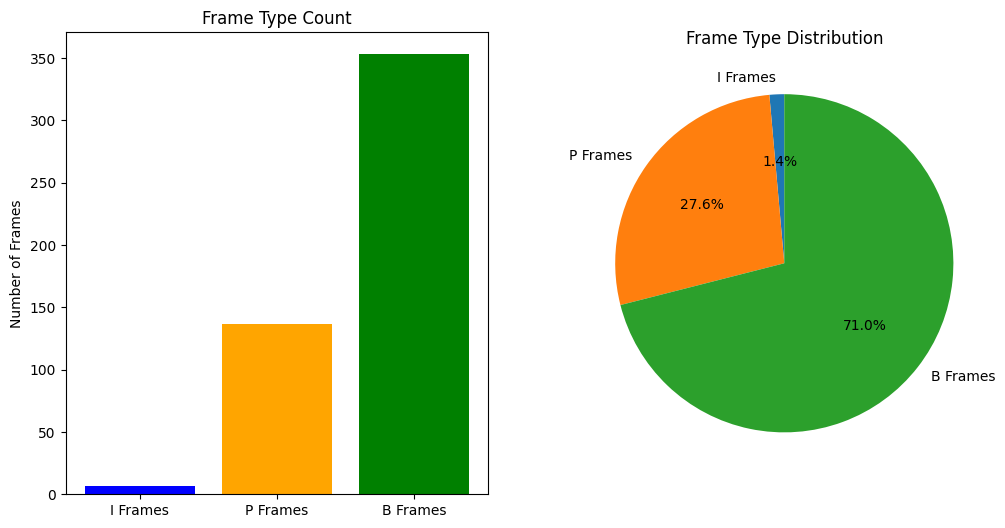

In [7]:
import av
import matplotlib.pyplot as plt

def analyze_frame_types(video_path):
    total_frames = 0
    frame_types = {'I': 0, 'P': 0, 'B': 0}

    container = av.open(video_path)

    for frame in container.decode(video=0):
        total_frames += 1
        frame_types[frame.pict_type.name] += 1

    return frame_types, total_frames

def plot_frame_distribution(frame_counts, total_frames):
    frame_types = ['I Frames', 'P Frames', 'B Frames']
    counts = [frame_counts.get('I', 0), frame_counts.get('P', 0), frame_counts.get('B', 0)]

    if total_frames > 0:
        percentages = [(count / total_frames) * 100 for count in counts]

        print("Frame Type Distribution:")
        for frame_type, count, percentage in zip(frame_types, counts, percentages):
            print(f"{frame_type}: Count = {count}, Percentage = {percentage:.2f}%")

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.bar(frame_types, counts, color=['blue', 'orange', 'green'])
        plt.title('Frame Type Count')
        plt.ylabel('Number of Frames')

        plt.subplot(1, 2, 2)
        plt.pie(percentages, labels=frame_types, autopct='%1.1f%%', startangle=90)
        plt.title('Frame Type Distribution')

        plt.show()
    else:
        print("No frames found in the video.")

def main(video_path):
    frame_counts, total_frames = analyze_frame_types(video_path)
    plot_frame_distribution(frame_counts, total_frames)

if __name__ == "__main__":
    video_path = '/content/input25fps.mp4'
    main(video_path)



Lab Task 3: Visualizing Frames\
Objective:\
Extract actual frames from the video and display them using Python.\
Steps:\
1.Extract Frames:
* Use ffmpeg to extract individual I, P, and B frames from the video.
* Save these frames as image files.
2.Display Frames:
* Use a library like PIL (Pillow) or opencv-python to display the extracted frames.
3.Tasks:
* Save I, P, and B frames as separate image files using ffmpeg.
* Use PIL or opencv-python to load and display these frames in a Python script.
* Compare the visual quality of I, P, and B frames.

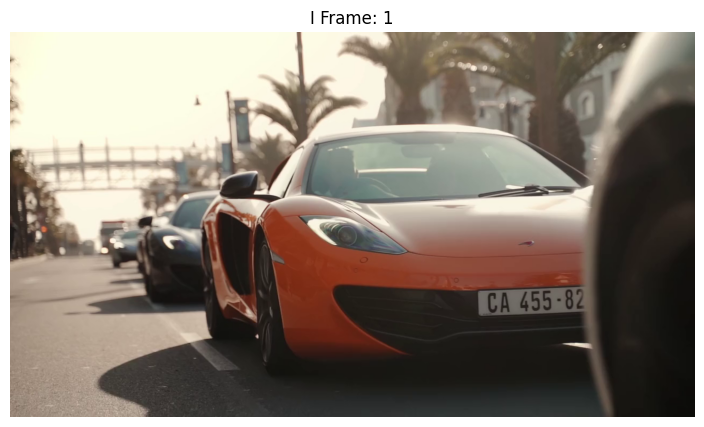

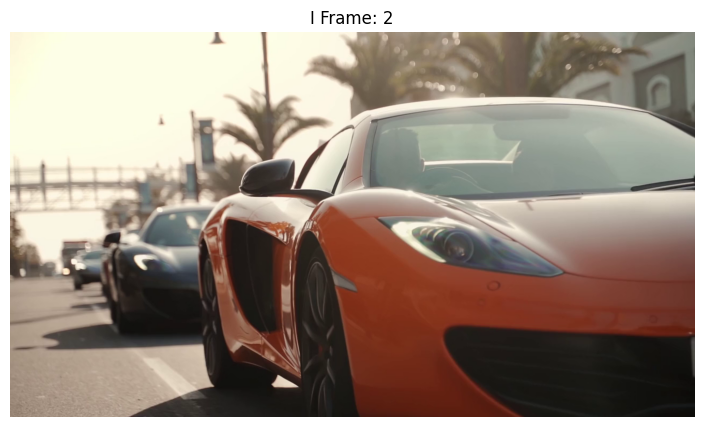

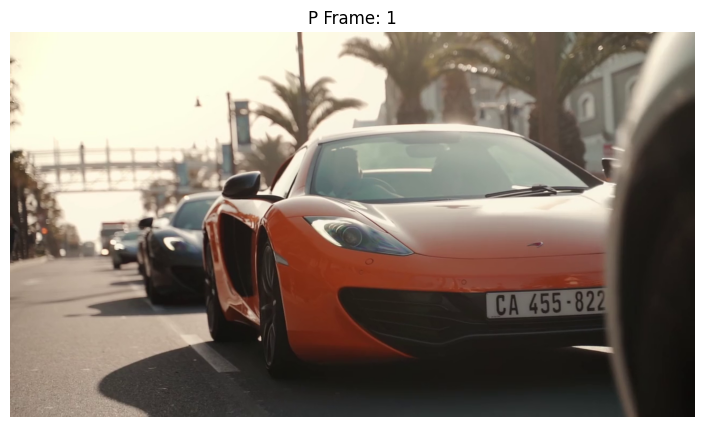

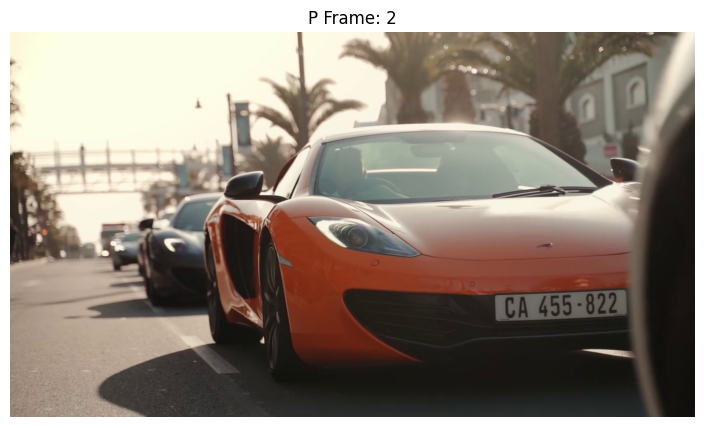

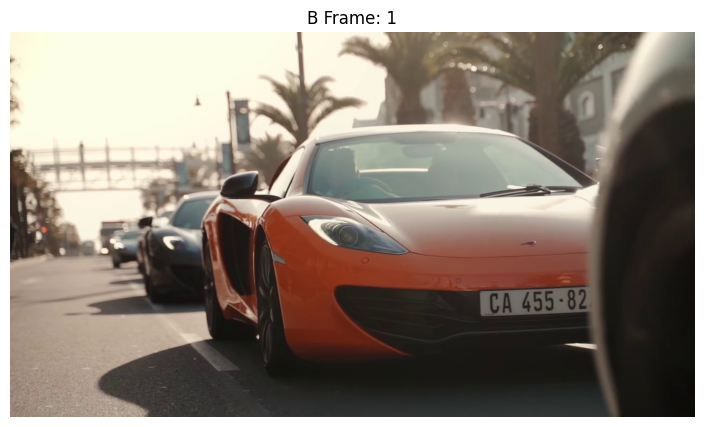

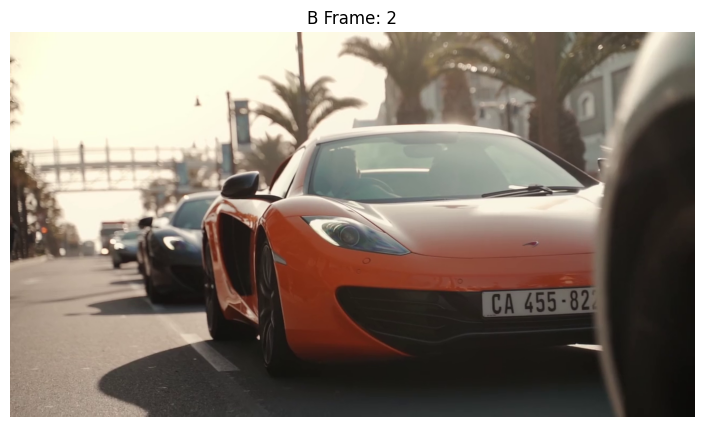

In [8]:
import av
import matplotlib.pyplot as plt
import numpy as np

container = av.open('/content/input25fps.mp4')

frame_counts = {'I': 0, 'P': 0, 'B': 0}

frames_to_display = {'I': [], 'P': [], 'B': []}

for frame in container.decode(video=0):
    frame_type = frame.pict_type.name

    if frame_counts[frame_type] < 2:
        frame_image = frame.to_image()

        frame_array = np.array(frame_image)

        frames_to_display[frame_type].append(frame_array)

        frame_counts[frame_type] += 1

    if all(count >= 2 for count in frame_counts.values()):
        break

def display_frames(frames, frame_type):
    for i, frame in enumerate(frames):
        plt.figure(figsize=(10, 5))
        plt.imshow(frame)
        plt.title(f"{frame_type} Frame: {i+1}")
        plt.axis('off')
        plt.show()

for frame_type in ['I', 'P', 'B']:
    display_frames(frames_to_display[frame_type], frame_type)



Lab Task 4: Frame Compression Analysis\
Objective:\
Analyze the compression efficiency of I, P, and B frames.\
Steps:\
1.Calculate Frame Sizes:
* Calculate the file sizes of extracted I, P, and B frames.
* Compare the average file sizes of each frame type.
2.Compression Efficiency:
* Discuss the role of each frame type in video compression.
* Analyze why P and B frames are generally smaller than I frames.

In [30]:
# Extract I frames
!ffmpeg -i input25fps.mp4 -vf "select='eq(pict_type\,I)'" -vsync vfr -frame_pts true I_frame_%04d.png

# Extract P frames
!ffmpeg -i input25fps.mp4 -vf "select='eq(pict_type\,P)'" -vsync vfr -frame_pts true P_frame_%04d.png

# Extract B frames
!ffmpeg -i input25fps.mp4 -vf "select='eq(pict_type\,B)'" -vsync vfr -frame_pts true B_frame_%04d.png


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [31]:
import os
import glob

def calculate_average_frame_size(frame_type):
    frame_files = glob.glob(f'{frame_type}_frame_*.png')
    total_size = sum(os.path.getsize(frame) for frame in frame_files)
    average_size = total_size / len(frame_files) if frame_files else 0
    print(f"Total size of all {frame_type} frames: {total_size} KB")
    return average_size

average_size_I = calculate_average_frame_size('I')
average_size_P = calculate_average_frame_size('P')
average_size_B = calculate_average_frame_size('B')

print(f"Average size of I frames: {average_size_I / 1024:.2f} KB")
print(f"Average size of P frames: {average_size_P / 1024:.2f} KB")
print(f"Average size of B frames: {average_size_B / 1024:.2f} KB")



Total size of all I frames: 5657724 KB
Total size of all P frames: 125794117 KB
Total size of all B frames: 321399144 KB
Average size of I frames: 789.30 KB
Average size of P frames: 896.68 KB
Average size of B frames: 889.14 KB


In video compression, three primary frame types—Intra-coded (I), Predicted (P), and Bidirectional (B) frames—each play unique roles. I-frames are key frames that are encoded independently, serving as reference points, but they are large due to containing complete image data. P-frames store only changes from previous frames, using predictive coding, resulting in smaller sizes by encoding just the differences. B-frames use both preceding and following frames for reference, capturing redundancies in both directions, making them the smallest.\
 P and B frames achieve higher compression through temporal compression and motion compensation, reducing data by encoding motion vectors and residual differences. This efficient compression reduces file sizes significantly compared to I-frames.

Lab Task 5: Advanced Frame Extraction\
Objective:\
Extract frames from a video and reconstruct a part of the video using only I frames.\
Steps:\
1.Extract and Save I Frames:
* Extract I frames from the video and save them as separate image files.
2.Reconstruct Video:
* Use the extracted I frames to reconstruct a portion of the video.
* Create a new video using these I frames with a reduced frame rate.



In [27]:
import subprocess
import os

def extract_i_frames(video_path, output_dir):
    try:
        os.makedirs(output_dir, exist_ok=True)

        cmd = [
            'ffmpeg',
            '-i', video_path,
            '-vf', 'select=eq(pict_type\\,I)',
            '-vsync', 'vfr',
            f'{output_dir}/frame_%04d.png'
        ]

        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(f"I-frames extracted successfully to {output_dir}")

    except Exception as e:
        print(f"Error extracting I-frames: {str(e)}")

video_path = '/content/input25fps.mp4'
i_frames_dir = 'I_frames'

extract_i_frames(video_path, i_frames_dir)


def reconstruct_video_from_i_frames(i_frames_dir, output_video_path, frame_rate=1):
    try:
        cmd = [
            'ffmpeg',
            '-framerate', str(frame_rate),
            '-i', os.path.join(i_frames_dir, 'frame_%04d.png'),
            '-c:v', 'libx264',
            '-pix_fmt', 'yuv420p',
            output_video_path
        ]
        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(f"Video reconstructed successfully and saved to {output_video_path}")

    except Exception as e:
        print(f"Error reconstructing video: {str(e)}")

output_video_path = 'reconstruct_video.mp4'
reconstruct_video_from_i_frames(i_frames_dir, output_video_path,frame_rate=3)

I-frames extracted successfully to I_frames
Video reconstructed successfully and saved to reconstruct_video.mp4


In [28]:
from IPython.display import Video
Video('reconstruct_video.mp4', embed=True)